# Notebook to load in magnetic field data from the Raspberry Pi magnetometer

This is a tutorial sheet to load in some data from the Raspberry Pi (RPi) magnetometer.

In this sheet, a set of Raspberry Pi data were recorded in Edinburgh on the 11th to 18th September 2014  locations anyway. 

--------

Notebook Author: Ciaran Beggan [ciar@bgs.ac.uk]

Date created: 16-Sep-2015

Date last modified: 16-Sep-2015

v0: Initial tutorial

-------
First - Load in some data from the RPi magnetometer, and display it on screen. The code below takes the 10 columns from the file and parses (arranges) them into a date format and data columns using a Python module called <i> pandas </i>.

In [5]:
''' Load in the raw data from file'''

import sys
import pandas as pd
import os.path as pth
from datetime import datetime

DATA_DIR =r'.'
DATA_FILENAME = 'MagData_11_18Sep2014.dat'

DATA_COL_NAMES = ['year', 'month', 'day', 'hour', 'minute', 'second', 'x', 'y', 'z', 'f']
TIME_COLS = ['year', 'month', 'day', 'hour', 'minute', 'second']  
data_file = pth.join(DATA_DIR, DATA_FILENAME)

def minutely_date_parser(year, month, day, hour, minute, second):
    from datetime import datetime
    year, month, day, hour, minute, second = [int(x) 
                     for x in [year, month, day, hour, minute, second]]
    #seconds = 0
    return (datetime(year, month, day, hour, minute, second))


data = pd.read_csv(data_file,
                   delim_whitespace=True,
                   names = DATA_COL_NAMES,                       
                   parse_dates={'datetime':TIME_COLS},
                   date_parser = minutely_date_parser,
                   index_col='datetime')


data[1:10]

,x,y,z,f
datetime,,,,
2014-09-11 17:06:58,16831.445,5826.953,49303.320,52422.022
2014-09-11 17:07:01,16831.836,5825.977,49302.148,52420.936
2014-09-11 17:07:04,16832.031,5826.562,49303.516,52422.350
2014-09-11 17:07:07,16831.445,5826.953,49302.148,52420.920
2014-09-11 17:07:10,16831.445,5826.367,49303.516,52422.140
2014-09-11 17:07:14,16830.859,5828.125,49299.609,52418.474
2014-09-11 17:07:17,16830.469,5828.906,49300.391,52419.170
2014-09-11 17:07:20,16830.273,5827.148,49301.367,52419.830
2014-09-11 17:07:23,16830.469,5827.344,49297.656,52416.425


The file is stored in a datetime <i> pandas </i> format which allows you to more easily assign dates and time. Sorry, I don't know why it's called pandas either.

The first column is the date and time converted into a standard format such as you might see in Excel. Each day is represented in memory as a number of days since the January 1st 0A.D but displayed in a format you or I recognise as a date. 

The next three columns are the three orthogonal components that we measured. Orthogonal means the sensors are all at 90 degrees to each other, so each one should be measuring part of the 3D vector magnetic field independent of the other two sensors. They are called X,Y and Z as a convention - in a similar way to the Euclidian/Cartesian system of 3D space that we all learn in Maths and Physics. They are also called North, East and Down (NED). 

The final column is the total field column and it is computed from the previous three columns: $f = \sqrt(x^2 + y^2 + z^2)$

Let's plot the data out as whole field components

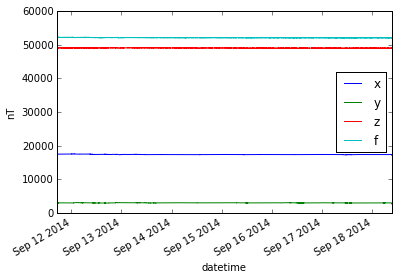

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
    
components = data.columns.tolist()
for cpt in components:       
    data[cpt].plot(label=cpt)   
    plt.ylabel('nT') 
    plt.legend(loc='best')
    

As you can see there's a wide range of values and the lines look pretty flat on the y-axis scale shown in the figure above. Let's plot out the individual components.

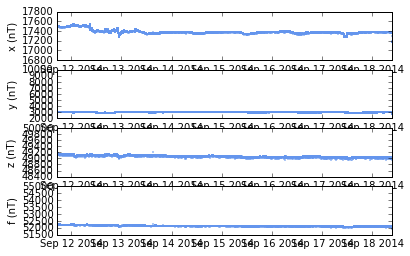

In [7]:
import matplotlib.pyplot as plt

marker_style = dict(color='cornflowerblue', linestyle='none', marker='.',
                    markersize=2)
                    
components = data.columns.tolist()
n_horiz_plots = len(components)
n_vert_plots = 1
fig = plt.figure()
#fig.subplots_adjust(vspace=1.0) 
    
for cpt_idx, cpt in enumerate(components):       
        ax = fig.add_subplot(n_horiz_plots, n_vert_plots, cpt_idx + 1)
        ax.plot(data.index, data[cpt], label=cpt, **marker_style)
        ax.axes.set_ylabel('{0} (nT)'.format(cpt))


You can see a bit more variation, so finally compute the Horizontal variation of $H = \sqrt(X^2 + Y^2)$ of the magnetic field.

In [14]:
datetime(2015, 9, 12, 1, 1, 1)

datetime.datetime(2015, 9, 12, 1, 1, 1)

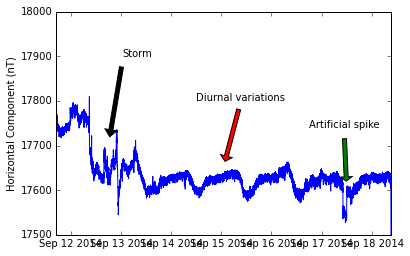

In [49]:
import numpy as np
import matplotlib.dates as mdates
import datetime as datetime

H = np.sqrt(data.x**2 + data.y**2)    
fig = plt.figure()

plt.plot(data.index, H)
plt.ylabel('Horizontal Component (nT)')
plt.ylim([17500,18000])

ax = fig.add_subplot(111)
ax.annotate('Storm', xy=(mdates.date2num(datetime.datetime(2014, 9, 12, 18, 1, 1)), 17700),
            xytext=(mdates.date2num(datetime.datetime(2014, 9, 13, 1, 1, 1)), 17900), 
            arrowprops=dict(facecolor='black', shrink=0.1))
ax.annotate('Diurnal variations', xy=(mdates.date2num(datetime.datetime(2014, 9, 15, 1, 1, 1)), 17650),
            xytext=(mdates.date2num(datetime.datetime(2014, 9, 14, 12, 1, 1)), 17800), 
            arrowprops=dict(facecolor='red', shrink=0.1))
ax.annotate('Artificial spike', xy=(mdates.date2num(datetime.datetime(2014, 9, 17, 12, 1, 1)), 17600),
            xytext=(mdates.date2num(datetime.datetime(2014, 9, 16, 18, 1, 1)), 17740), 
            arrowprops=dict(facecolor='green', shrink=0.15))

This is a bit more interesting. You can now see features such as a geomagnetic storm on the 11th - 13th, diurnal variation on the 14th to the 16th and some manmade disturbance on the 17th.